In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import numpy as np

# Part I. Crime statistics

Crime Rate in 47 states of the USA with 13 explanatory variables  
The crime rate (**Y**) in 47 states in the U.S. was reported together with possible factors that might influence it. The factors recorded are as follows;  
X1 = the number of males aged 14 - 24 per 1000 of total state population  
X2 = binary variable distinguishing southern states (X2 =1) from the rest (X2=0).  
X3 = the mean number of years of schooling x 10 of the population, 25 years old and over  
X4 = police expenditure (in dollars) per person by state and local government in 1960  
X5 = police expenditure (in dollars) per person by state and local government in 1959  
X6 = labour force participation rate per 1000 civilian urban males in the age group 14-24  
X7 = the number of males per 1000 females  
X8 = state population size in hundred thousands  
X9 = unemployment rate of urban males per 1000 in the age group 14-24    
X10 = unemployment rate of urban males per 1000 in the age group 35-59.  
X11 = the median value of family income or transferable goods and assets (unit 10 dollars)  
X12 = the number of families per 1000 earning below one-half of the median income.  

In [2]:
data = pd.read_excel('Crime.xlsx')

In [3]:
features = ['males','south','yrsSch','policExp60','policeExp59','labour',
           'M/F','statePop','unemp14','unemp35','income','proverty']

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,151,1,91,58,56,510,950,33,108,41,394,261,79.1
1,143,0,113,103,95,583,1012,13,96,36,557,194,163.5
2,142,1,89,45,44,533,969,18,94,33,318,250,57.8
3,136,0,121,149,141,577,994,157,102,39,673,167,196.9
4,141,0,121,109,101,591,985,18,91,20,578,174,123.4


## Q1. Report the correlation coefficients between each feature and the output variable Y (crimes per 100.000)
## Q2. Look at the impact of each feature separately (on all 47 observations)
    # Fit bi-variate regressions and report the estimate as well as the p-values
## Q3. Take for the further consideration only those which have correlation coefficient with Y above 60%
    # Fit the multi-variate regression with them, report statistics
## Q4. Run cross-validation with the regressors in Q3, report the Out-of-sample R2 (OS R2)
    # Put 2/3 observations on average into training set and the remaining 1/3 into test set
    # Run it 1000 times, obtain the average value

In [5]:
#1) 
def get_corr(a,b):
    corr = np.corrcoef(a,b)
    return(corr[0][1])

corr_coef = np.empty(data.shape[1]-1)
for i in range(12):
    col_name = 'X'+str(i+1)
    corr_coef[i] = get_corr(data[col_name], data.Y)
    
print(corr_coef)

[-0.0894724  -0.09063696  0.32283487  0.68760446  0.66671414  0.18886635
  0.21391426  0.33747406 -0.05047792  0.17732065  0.44131995 -0.17902373]


In [6]:
length = data.shape[1]-1
regression_info = {}

for i in range(length): 
    info = {}
    col_name = 'X'+str(i+1)
    reg = smf.ols('Y ~ '+ col_name, data).fit()
    paramaters = reg.params
    pvalues = reg.pvalues 
    info['params'] = paramaters
    info['pvalues'] = pvalues
    regression_info[col_name] = info

In [7]:
regression_info

{'X1': {'params': Intercept    128.664557
  X1            -0.275347
  dtype: float64, 'pvalues': Intercept    0.048939
  X1           0.549789
  dtype: float64}, 'X10': {'params': Intercept    62.916195
  X10           0.812047
  dtype: float64, 'pvalues': Intercept    0.010348
  X10          0.233108
  dtype: float64}, 'X11': {'params': Intercept   -2.428261
  X11          0.176893
  dtype: float64, 'pvalues': Intercept    0.932788
  X11          0.001902
  dtype: float64}, 'X12': {'params': Intercept    124.177253
  X12           -0.173550
  dtype: float64, 'pvalues': Intercept    0.000063
  X12          0.228577
  dtype: float64}, 'X2': {'params': Intercept    93.00000
  X2           -7.31875
  dtype: float64, 'pvalues': Intercept    3.412758e-17
  X2           5.445860e-01
  dtype: float64}, 'X3': {'params': Intercept   -27.396654
  X3            1.116121
  dtype: float64, 'pvalues': Intercept    0.599552
  X3           0.026878
  dtype: float64}, 'X4': {'params': Intercept    14.4

In [8]:
data.columns[0:12][corr_coef > 0.6] 

Index(['X4', 'X5'], dtype='object')

In [9]:
reg1 = smf.ols('Y ~ X4 + X5', data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     21.48
Date:                Wed, 01 Nov 2017   Prob (F-statistic):           3.09e-07
Time:                        11:09:00   Log-Likelihood:                -221.97
No. Observations:                  47   AIC:                             449.9
Df Residuals:                      44   BIC:                             455.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8265     12.593      1.257      0.215      -9.552      41.205
X4             2.5615      1.234      2.076      0.044       0.074       5.049
X5            -1.7829      1.312     -1.359      0.181      -4.427       0.861
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.394
Skew:                          -0.186   Prob(JB):                        0.821
Kurtosis:                       2.751   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X=np.matrix(data.iloc[:, 0:12])
Y=np.array(data.iloc[:,12:13])
def AdjR2(flag,n=10):
  R_IS=[]
  R_OS=[]
  for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X[:,flag], Y, test_size= 0.33)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
  R2_IS=np.mean(R_IS)  
  R2_OS=np.mean(R_OS)
  return R2_IS, R2_OS, res  

In [11]:
n=X.shape[1]
def FindBestI():
    flag = np.zeros(n)    # initially exclude all regressors: 1-include, 0-exclude
    r2max = 0             # for storing and compare with best R^2
    while True:
        flag_mat = np.maximum(np.eye(n),flag) #create the matrix with rows representing the cases of adding each new feature
        # see if R2 increases if we add one more feature
        r2 = np.apply_along_axis(AdjR2,1,flag_mat==1)[:,0]  # 1: row-wise operation producing the validation R2 for each row (combination of features)
        temp = r2.max() #take the best R2
        if temp > r2max:
            r2max = temp
            flag = flag_mat[r2.argmax()]  # select the feature set that improved R2
        else:
            break                         # if there's nothing to add, break the loop
    return flag

flag = FindBestI()             # store the best choice of feature selection
R2_IS,R2_OS,lm_best = AdjR2(flag==1)  # then run the regression based on such selection
print("IS R-squared after feature selection is {}".format(R2_IS))
print("OS R-squared after feature selection is {}".format(R2_OS))
flag

IS R-squared after feature selection is 0.515220280786972
OS R-squared after feature selection is 0.2576408020337167


array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.])

__After running cross validation, we end up selecting different features__

#  Part II. Learning Seattle's Work Habits from Bicycle Counts


The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. These data come from an automated bicycle counter, installed in late 2012, which has inductive sensors under the sidewalks on either side of the bridge. The daily or hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the hourly dataset. To download the data directly, you can uncomment the following curl command:

In [12]:
data = pd.read_csv("Bridge.csv", index_col='Date', parse_dates=True)
data=data.iloc[:-12000,:]
data.tail()

#We'll do some quick data cleaning: 
#we'll rename the columns to the shorter "West" and "East", 
#set any missing values to zero, and add a "Total" column:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)
data['Total'] = data.eval('East + West')

In [13]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


C:\Users\caoba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


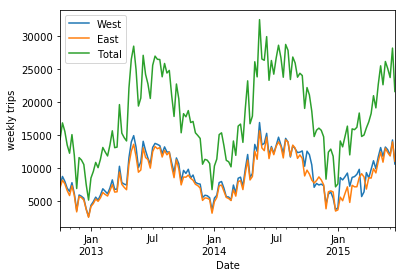

In [14]:
data.resample('W', how='sum').plot()
plt.ylabel('weekly trips');

In [15]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)
pivoted.head()

East                                      ... West                 \
Date         0  1  2    3  4   5   6    7    8    9  ...   14   15   16   17   
2012-10-03    9  6  1  3.0  1  10  50   95  146  104 ...   77   72  133  192   
2012-10-04   11  0  6  3.0  1  11  51   89  134   94 ...   63   73  114  154   
2012-10-05    7  4  3  2.0  2   7  37  101  119   81 ...   63   80  120  144   
2012-10-06    7  5  2  2.0  1   2  15   16   47   55 ...   89  115  107  107   
2012-10-07    5  5  1  2.0  2   3   8   12   26   36 ...  126  122  132  118   

                                     
Date         18  19  20  21  22  23  
2012-10-03  122  59  29  25  24   5  
2012-10-04  137  57  27  31  25  11  
2012-10-05  107  42  27  11  10  16  
2012-10-06   41  40  25  18  14  15  
2012-10-07   68  26  19  12   9   5  

[5 rows x 48 columns]

In [16]:
X = pivoted.values
X.shape

(990, 48)

In [18]:
Xn=X
for i in range(0,990):
  Xn[i]=X[i]/sum(X[i])

## Q5. 

Visualize the data using PCA (two dimensions). Color the points by the day of the week

[  7.38636998e-01   7.30100942e-02   3.77165144e-02   2.42311818e-02
   1.37470818e-02   1.20239117e-02   1.04680683e-02   8.16115044e-03
   6.82555867e-03   5.67680535e-03   5.33118526e-03   4.77522946e-03
   4.47441373e-03   4.38892499e-03   4.20498204e-03   3.66368746e-03
   3.61544079e-03   3.45670894e-03   3.43978826e-03   3.15493433e-03
   3.04606426e-03   2.86766920e-03   2.45496753e-03   2.36441599e-03
   1.95867186e-03   1.89976289e-03   1.63012498e-03   1.51127891e-03
   1.39009992e-03   1.23931920e-03   1.05029733e-03   9.32511972e-04
   8.74301824e-04   7.83969775e-04   6.70099000e-04   6.27598682e-04
   6.07965473e-04   5.53989702e-04   4.71813109e-04   4.29097731e-04
   3.94068762e-04   3.72275234e-04   2.59916359e-04   1.95765005e-04
   1.63037554e-04   1.53323411e-04   9.49339864e-05   2.10058983e-33]


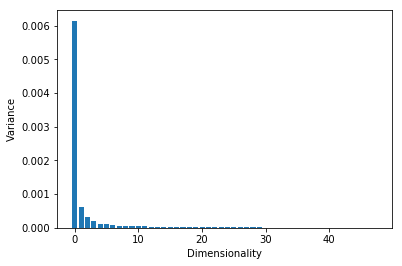

In [19]:
n=48
pca = PCA(n)
Xproj = pca.fit_transform(Xn)
eigenvalues = pca.explained_variance_
print(pca.explained_variance_ratio_)
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show();

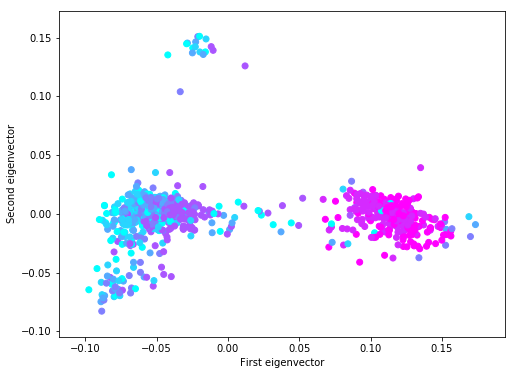

In [32]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c = pd.to_datetime(pivoted.index).weekday, cmap=plt.cm.cool)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()